## Predicting next day stock prices for S&P 500 - Srihan Cheemangunta

In [2]:
import joblib
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## Loading the Saved Model and Preparing it for Next Day Predictions

We load the saved joblib file and then we use the best model to make predictions on the next day stock market prices. 

In [ ]:
# Load the saved best model and the last date from the dataset
best_model = joblib.load("S&P500_gbrModel.joblib")
last_date = joblib.load("S&P500_lastDate.joblib")

next_date = last_date + 1
X_next = np.array([[next_date]])



## Using Best Model Prediction for Forecasting Next day's S&P closing prices

This loads the preprocessed training data and saves the Gradient Boosting model. We then take the last training date which was April 11, 2015 and use the best model to forecast the stock market closing prices the next day April 12, 2015. The model shows the actual prices data, the trained model data and a circle marker which shows the model's prediction for the next day closing prices.

Last training date (ordinal): 736041 (April 11, 2015)
Next date (ordinal): 736042 (April 12, 2015)
Predicted next-day closing price result: $1971.47


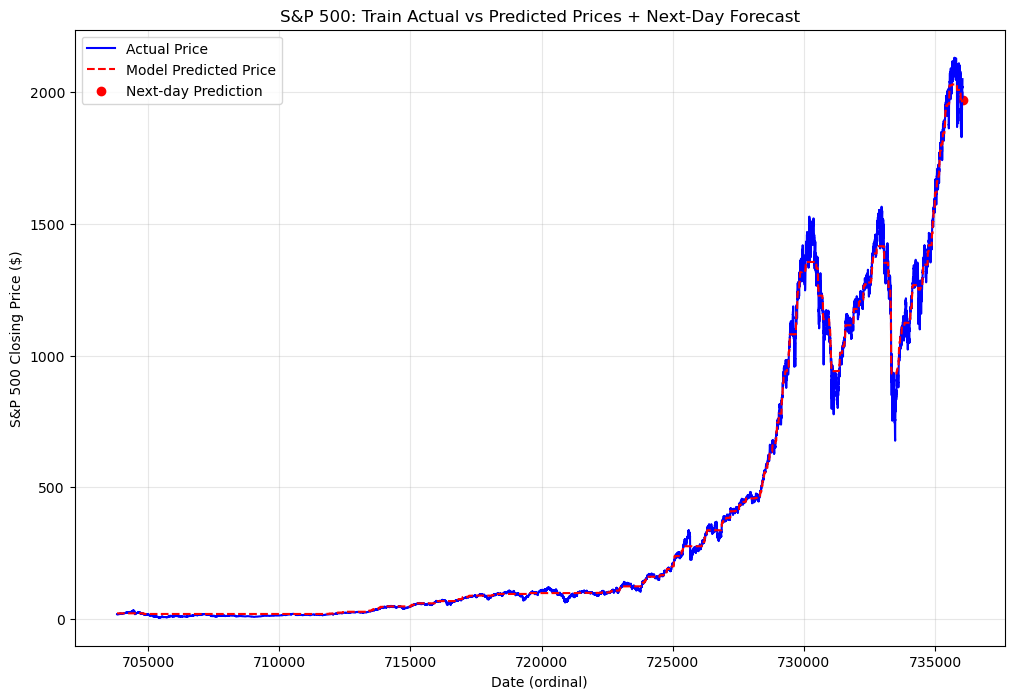

In [25]:
# Loads preprocessed training data 
data = np.load("preprocessed_data.npz")
X_train = data["X_train"] 
y_train = data["y_train"]

# Handle shape of X_train makes sure its 2D polynomial 
if X_train.ndim == 1:
    X_train_input = X_train.reshape(-1, 1)
else:
    X_train_input = X_train.reshape(-1, 1)

# Takes the 'date' column from training set and gets model predictions 
X = X_train_input[:, 0]
y_pred = best_model.predict(X_train_input)

# Finds last training data from the datset and predicts the next day
last_training_date = X.max() 
next_training_date = last_training_date + 1
X_next = np.array([[next_training_date]])
next_price_pred = best_model.predict(X_next)[0]

print("Last training date (ordinal):", last_training_date, "(April 11, 2015)")
print("Next date (ordinal):", next_training_date, "(April 12, 2015)")
print(f"Predicted next-day closing price result: ${next_price_pred:.2f}")

plt.figure(figsize=(12, 8))

# Plots the actual prices from the dataset
plt.plot(X, y_train, label="Actual Price", color="blue")

# Plots the predicted prices from the model
plt.plot(X, y_pred, label="Model Predicted Price", color="red", linestyle="--")

# Plots the next-day prices as a circle for better plot understanding
plt.scatter( 
    [next_training_date], 
    [next_price_pred], 
    marker="o", 
    color="red", 
    label="Next-day Prediction", 
    )

plt.xlabel("Date (ordinal)")
plt.ylabel("S&P 500 Closing Price ($)") 
plt.title("S&P 500: Train Actual vs Predicted Prices + Next-Day Forecast")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Analysis on Model Performance on Next Day Predictions

Looking at the output it is shown that the the next day predictions price is the exact same value as the model prediction at $1947.71. The reason for this is because gradient boosting regression trees cannot make comparisons or predictions on data that hasn't been trained since the model wouldn't be able to find those complex patterns withot looking at the data. Comparing this to Nasdaq 100, S&P 500 produces a better model since this model is capturing all complex patterns in the dataset.